In [32]:
%matplotlib inline

In [33]:
import sys
sys.path.append('..')
from ai4mat.data.data import (
    read_structures_descriptions,
    read_defects_descriptions,
    Columns
)

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from itertools import chain
from collections import Counter
from operator import itemgetter

In [36]:
data_path = "../datasets/POSCARs/MoS2"
structures = read_structures_descriptions(data_path)
defects = read_defects_descriptions(data_path)
COLUMNS = Columns()

In [37]:
defect_descriptions = defects.loc[structures.loc[:, COLUMNS["structure"]["descriptor_id"]], "defects"]

In [38]:
class hashabledict(dict):
    def __hash__(self):
        return hash(frozenset(self.items()))

In [39]:
all_defects = frozenset(map(hashabledict, chain.from_iterable(defect_descriptions)))

In [40]:
all_defects

frozenset({{'type': 'substitution', 'from': 'Mo', 'to': 'W'},
           {'type': 'substitution', 'from': 'S', 'to': 'Se'},
           {'type': 'vacancy', 'element': 'Mo'},
           {'type': 'vacancy', 'element': 'S'}})

In [41]:
per_structure_counts = [Counter(map(hashabledict, this_structure_defect)) for this_structure_defect in defect_descriptions]

In [42]:
per_structure_counts

[Counter({{'type': 'vacancy', 'element': 'S'}: 1,
          {'type': 'vacancy', 'element': 'Mo'}: 1,
          {'type': 'substitution', 'from': 'S', 'to': 'Se'}: 2}),
 Counter({{'type': 'substitution', 'from': 'S', 'to': 'Se'}: 2,
          {'type': 'substitution', 'from': 'Mo', 'to': 'W'}: 1,
          {'type': 'vacancy', 'element': 'S'}: 1}),
 Counter({{'type': 'vacancy', 'element': 'S'}: 2,
          {'type': 'substitution', 'from': 'Mo', 'to': 'W'}: 1,
          {'type': 'substitution', 'from': 'S', 'to': 'Se'}: 1}),
 Counter({{'type': 'substitution', 'from': 'S', 'to': 'Se'}: 2,
          {'type': 'substitution', 'from': 'Mo', 'to': 'W'}: 1,
          {'type': 'vacancy', 'element': 'S'}: 1}),
 Counter({{'type': 'vacancy', 'element': 'S'}: 1,
          {'type': 'vacancy', 'element': 'Mo'}: 1,
          {'type': 'substitution', 'from': 'S', 'to': 'Se'}: 2}),
 Counter({{'type': 'vacancy', 'element': 'S'}: 3,
          {'type': 'substitution', 'from': 'Mo', 'to': 'W'}: 1}),
 Counter({

In [45]:
count_distributions = {
    defect_type: np.fromiter(
        map(itemgetter(defect_type), per_structure_counts),
        dtype=int, count=len(per_structure_counts)) \
    for defect_type in all_defects
}
count_distributions[hashabledict({"type": "total"})] = \
    np.fromiter(map(len, defect_descriptions), dtype=int, count=len(defect_descriptions))

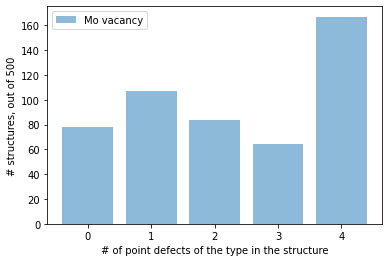

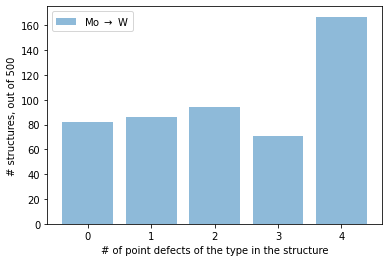

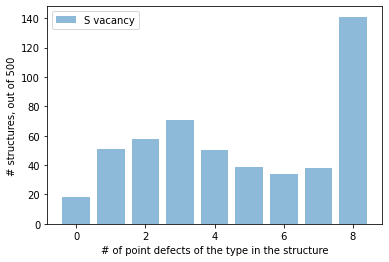

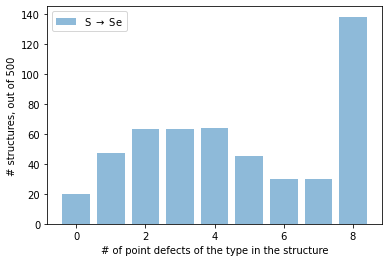

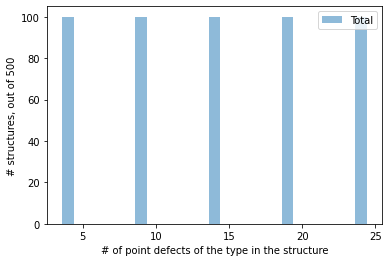

In [44]:
for defect_type, counts in count_distributions.items():
    fig, ax = plt.subplots()
    values, counts_of_counts = np.unique(counts, return_counts=True)
    if defect_type['type'] == 'vacancy':
        label = f'{defect_type["element"]} vacancy'
    elif defect_type['type'] == "substitution":
        label = f'{defect_type["from"]} $\\rightarrow$ {defect_type["to"]}'
    elif defect_type["type"] == "total":
        label = "Total"
    else:
        raise ValueError(f"Unknown defect type {defect_type['type']}")
    ax.bar(values, counts_of_counts, label=label, alpha=0.5)
    ax.legend()
    ax.set_ylabel(f"# structures, out of {len(per_structure_counts)}")
    ax.set_xlabel("# of point defects of the type in the structure")
    fig.savefig(f"defect_density_plots/{str(defect_type)}.pdf", bbox_inches='tight')